# 

# IML assignment 1
## Nabiullin Damir 
## d.nabiullin@innopolis.university

# Import numpy, pandas, and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

# Read given data set

In [2]:
# Read data set
data = pd.read_csv('a1_dataset.csv')
data = data.drop(['var7'], axis = 1)
data.shape

(925, 7)

# Preprocessing

## Encoding

### Prepare features for encoding

In [3]:
# Prepare features for encoding
features_name = ['var3', 'var6']
len(pd.unique(data['var3']))

236

### OneHot Encoding

I decided to use Ordinal encoding for *var3* and *va6*. 

As we disscussed on lab: For categorical variables where ordinal relationship exists, we use Ordinal encoding. 
Therefore, it seems that it is better to use the OneHot encoding. 
But in this task we have 236 unique countries in column *var3*. 
Therefore, when we use OneHot encoding, our data contains 241 features. 
On this amount of features it is hard/impossible to use polynomial regression with degree more than 2.

In addition, I tried both Ordinal and OneHot encoders. For Ordinal encoding linear regression has error less than for OneHot regression.

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
encoder = OrdinalEncoder()

# Create new data frame
new_feats = encoder.fit_transform(data[features_name])
new_cols = pd.DataFrame(new_feats, dtype=int, columns=features_name)
new_data = data.drop(features_name, axis=1)
new_data = pd.concat([new_data, new_cols], axis=1)
new_data


,target,var1,var2,var4,var5,var3,var6
0,0,509.18,417.681,138.0,393.00,137,0
1,0,446.06,666.182,81.0,352.05,57,1
2,1,235.50,398.097,90.0,339.00,101,0
3,0,306.02,518.163,102.0,439.25,216,1
4,0,453.08,600.156,105.0,422.95,36,0
...,...,...,...,...,...,...,...
920,0,422.34,547.259,NaN,350.45,19,1
921,1,342.62,473.919,NaN,200.85,105,0
922,1,265.10,538.170,NaN,208.35,179,1
923,0,397.12,622.386,NaN,433.45,41,1


## Data Imputation

### Prepare data for predicting *var4*

In [5]:
# Split data on nan and not nan
data_var4 = new_data[new_data['var4'].notna()]
predict_data_var4 = new_data[new_data['var4'].isna()]

# Print shapes of datas
print('Testing:', predict_data_var4.shape, 'Training:', data_var4.shape)

Testing: (600, 7) Training: (325, 7)


In [6]:
from sklearn.model_selection import train_test_split

# Creata X_predict on which we will predict var4
X_predict = pd.concat([predict_data_var4.loc[:, :'var2'], 
                       predict_data_var4.loc[:, 'var5':]], 
                       axis=1)

# Split data for training and testing
X = pd.concat([data_var4.loc[:, :'var2'], 
               data_var4.loc[:, 'var5':]], 
               axis=1)
y = data_var4['var4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

# Create Linerar Regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict values
y_pred = regressor.predict(X_test)

#### Errors

In [8]:
from sklearn import metrics

# Print errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.852377860135828
Mean Squared Error: 466.22346114902194
Root Mean Squared Error: 21.592208343497937


### Polynomial regression

In [9]:
# Create list of degrees to try
degrees = [i for i in range(2, 10)]

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create lists to store errors
mae_to_plot = []
mse_to_plot = []
rmse_to_plot = []

# Try polynomial regression on different degrees
for i in degrees:
    polynomial_features = PolynomialFeatures(degree=i)
    linear_regression = LinearRegression()
    regressor = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae_to_plot.append(metrics.mean_absolute_error(y_test, y_pred))
    mse_to_plot.append(metrics.mean_squared_error(y_test, y_pred))
    rmse_to_plot.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#### Errors

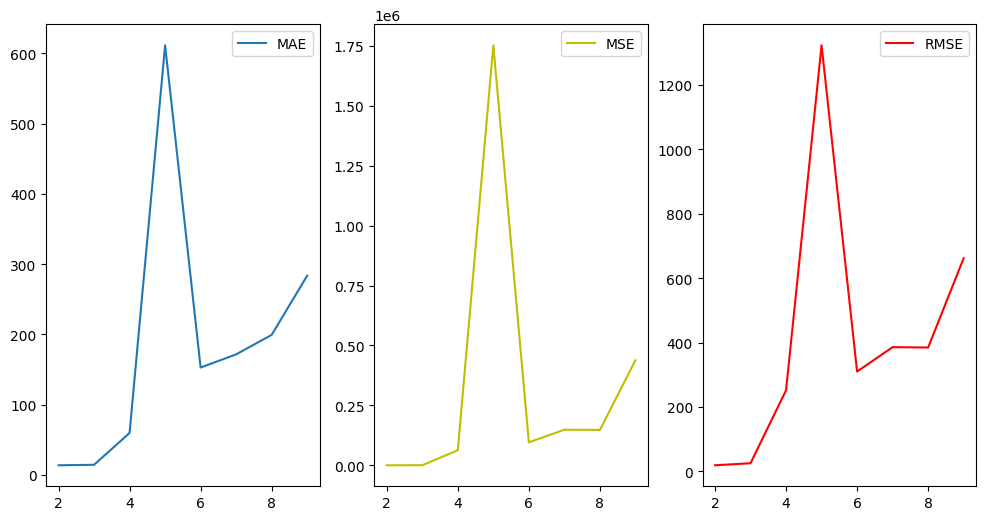

MAE [13.899461298722487, 14.583135535787019, 59.84411592998535, 611.3977599842129, 152.93881372428487, 171.68460546533225, 199.4223919316014, 283.66295030062304]
MSE [340.8565146505334, 615.6856531299427, 63199.33668435515, 1752099.5786883014, 95953.74157175698, 148643.8589572711, 147754.87303382097, 438276.3454207375]
RMSE [18.46229982018853, 24.81301378571218, 251.39478253208668, 1323.668983805355, 309.76400948424754, 385.5435889199444, 384.38896060347645, 662.0244296253255]


In [11]:
# Split plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Plot data
ax1.plot(degrees, mae_to_plot, label='MAE')
ax2.plot(degrees, mse_to_plot, label='MSE', c='y')
ax3.plot(degrees, rmse_to_plot, label='RMSE', c='r')

# Show plots
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Print values of errors
print('MAE', mae_to_plot)
print('MSE', mse_to_plot)
print('RMSE', rmse_to_plot)

### Find the missing values of *var4*

According to errors, it is better to use polynomial regression of the second degree to predict *var4*

In [12]:
# Prepare polynomial regression
polynomial_features = PolynomialFeatures(degree=2)
regressor = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
regressor.fit(X, y)

# Predict values
y_predict = regressor.predict(X_predict)

# Create new data frame
X['var4'] = y
X_predict['var4'] = y_predict

preprocessed_data = pd.concat([X, X_predict], axis=0)
preprocessed_data

,target,var1,var2,var5,var3,var6,var4
0,0,509.18,417.681,393.00,137,0,138.000000
1,0,446.06,666.182,352.05,57,1,81.000000
2,1,235.50,398.097,339.00,101,0,90.000000
3,0,306.02,518.163,439.25,216,1,102.000000
4,0,453.08,600.156,422.95,36,0,105.000000
...,...,...,...,...,...,...,...
920,0,422.34,547.259,350.45,19,1,36.738411
921,1,342.62,473.919,200.85,105,0,138.343895
922,1,265.10,538.170,208.35,179,1,133.485252
923,0,397.12,622.386,433.45,41,1,134.249771


## Implementing the PCA

### Data scaling

As we discussed on labs - PCA is sensitive to scaling. Therefore, I scale data using StandardScaler.

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale data for PCA
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(preprocessed_data)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=preprocessed_data.columns)

### PCA

In [14]:
# My PCA class
class PCA:
    dim : int
    good_eig_v : np.ndarray
    exp_var : list


    # Dim in this case can represent dimension or expected variance (As it works in sklearn)
    def __init__(self, dim):
        if type(dim) == int and dim < 1:
            raise Exception('Given dimension is less than 1')
        if type(dim) == float and (0 > dim or dim > 1):
            raise Exception('Given % of variance is incorrect')
        self.dim = dim


    # Function that transforms given data frame using good eigenvectors
    def transform(self, to_pca_data):
        if type(to_pca_data) == pd.core.frame.DataFrame:
            return np.dot(to_pca_data.values, self.good_eig_v)
        else:
            return np.dot(to_pca_data, self.good_eig_v)


    # Function that returns Explained variance
    def explained_variance_ratio(self):
        return self.exp_var


    # Function to fit given data and calculate best eigenvectors for use
    def fit(self, to_pca_data, plot_eginvalues=False, print_eigenvectors=False):
        # Calculate covariance
        cov = np.cov(to_pca_data.T)

        # Get eigenvalues and eigenvectors
        w, v = np.linalg.eig(cov)

        if self.dim > len(v):
            raise Exception('Given dimension is more than initial dimension')

        if plot_eginvalues:
            plt.bar([i+1 for i in range(len(w))], w)
            plt.title("Eigenvalues")
            plt.xlabel("Magnitude of the eigenvalue")
            plt.show()

        column_names = [f'v{i+1}' for i in range(len(v))]

        # Represent eigenvectors as dataframe
        v = pd.DataFrame(v, columns=column_names)
        if print_eigenvectors:
            print(v)

        total_egnvalues = sum(w)
        self.exp_var = [(i/total_egnvalues) for i in sorted(w, reverse=True)]
        
        sorted_names = [i for _, i in sorted(zip(w, column_names), reverse=True)]
        if type(self.dim) == int:
            self.good_eig_v = v[sorted_names[:self.dim]].values
            self.exp_var = self.exp_var[:self.dim]
        else:
            cum_sum = np.cumsum(self.exp_var)
            for i in range(len(cum_sum)):
                if cum_sum[i] > self.dim:
                    self.good_eig_v = v[sorted_names[:i+1]].values
                    self.exp_var = self.exp_var[:i+1]
                    break

        return self

According to eigenvalues - we need to take the first and the sixth eigenvectors to get the best result

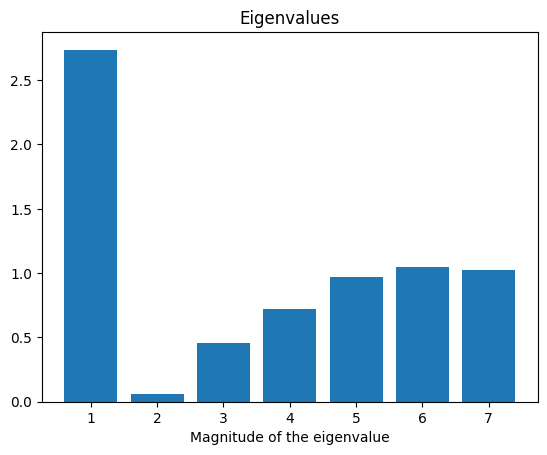

In [15]:
# Initialize my PCA object and fit it
pca = PCA(2)
pca.fit(scaled_data, plot_eginvalues=True)

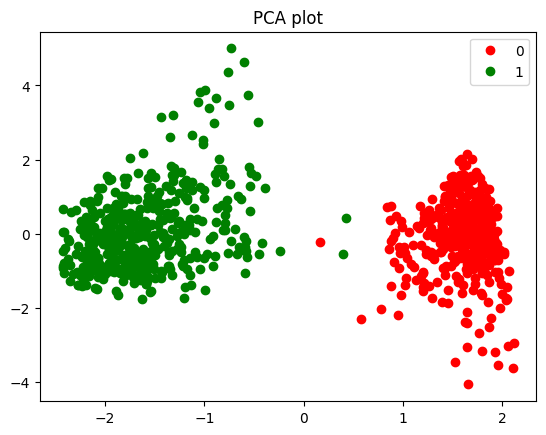

In [16]:
# Use eigenvectors with the highest eigenvalues for pca
x_pca = pca.transform(scaled_data)

# Prepare data for ploting
color = ['r', 'g']
label = [0, 1]
to_plot = pd.DataFrame(x_pca, columns=['x', 'y'])
to_plot = pd.concat([preprocessed_data.loc[:, :'target'], to_plot], axis=1)

# Plot data
for i in range(len(label)):
    x_y_temp = to_plot.loc[to_plot['target']==label[i], 'x':'y']
    x_temp = x_y_temp['x']
    y_temp = x_y_temp['y']
    c = color[i]
    l = label[i]
    plt.plot(x_temp, y_temp, 'o', c=c, label=str(l))

# Show plot
plt.legend()
plt.title("PCA plot")
plt.show()

# Training

### Split and scale preprocessed data

Firstly, we need to split preprocessed data on training and testing

In [17]:
# Split data to target and features
X = preprocessed_data.iloc[:, 1:]
y = preprocessed_data['target']

# Split data to training and testing
random_state = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=random_state, 
                                                    shuffle=True)

And scale it

In [18]:
# Scale testing and training data
scaler = StandardScaler()
scaler.fit(X_train)

# Create Data Frames with scaled data
X_train = pd.DataFrame(scaler.transform(X_train), 
                       columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_test.columns)

## Without PCA

### Logistic Regression

#### Check perfomance using cross validation on training set

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model and check it through KFold Cross-Validation 
logistic_reg = LogisticRegression(random_state=0)
scores = cross_val_score(logistic_reg, X_train, y_train,
                         cv=3, scoring='accuracy')
avg_score = np.mean(scores)
print('Cross-Validation score is:', avg_score)

Cross-Validation score is: 0.9891928069078261


#### Check perfomance on testing set

In [20]:
# Fit model on training set
logistic_reg.fit(X_train, y_train)

# Check perfomance on testing set
y_pred = logistic_reg.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9891891891891892


### KNN

#### Check perfomance using cross validation on training set

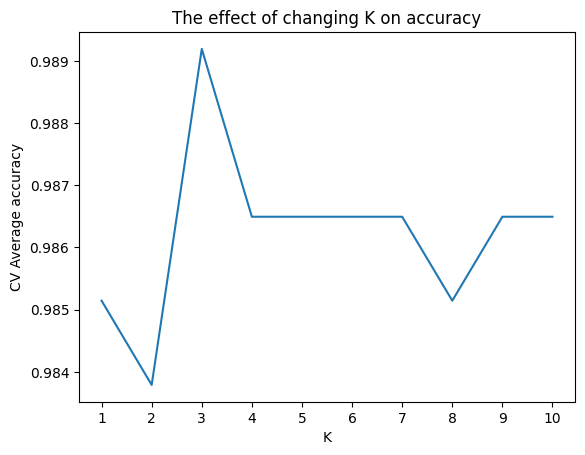

Best K: 3
Best Cross-Validation Score: 0.9891928069078261


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Create data for testing hyperparameters
neighbors = list(range(1, 11))
cv_scores = []

# Create KNN model and check it through KFold Cross-Validation on different number of neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train,
                             cv=3, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

# Plot average accurancy on different number of neighbors
plt.title('The effect of changing K on accuracy')
plt.plot(neighbors, cv_scores)
plt.xlabel('K')
plt.xticks(neighbors)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', neighbors[np.argmax(cv_scores)])
print('Best Cross-Validation Score:', cv_scores[np.argmax(cv_scores)])

#### Check perfomance on testing set

In [22]:
# Fit model on training set with the best number of neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Check perfomance on testing set
y_pred = knn.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9837837837837838


### Naive Bayes

#### Check perfomance using cross validation on training set

In [23]:
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes model and check it through KFold Cross-Validation 
gauss_nb = GaussianNB()
scores = cross_val_score(gauss_nb, X_train, y_train,
                         cv=3, scoring='accuracy')
avg_score = np.mean(scores)
print('Cross-Validation score is:', avg_score)

Cross-Validation score is: 0.9838056680161943


#### Check perfomance on testing set

In [24]:
# Fit model on training set
gauss_nb.fit(X_train, y_train)

# Check perfomance on testing set
y_pred = gauss_nb.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9837837837837838


## With PCA

### Scale data for PCA and fit it

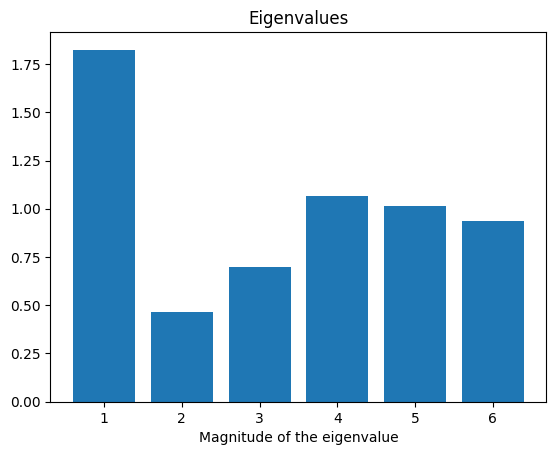

Cumulative Variances (Percentage):
[0.30365052 0.48154599 0.65067063 0.80682759 0.92291275]


In [25]:
# Number of components of PCA
components = 0.9

# Prepare PCA data
pca = PCA(components)
pca.fit(X_train, plot_eginvalues=True)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Cumulative Variances
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio()))

### Logistic Regression

#### Check perfomance using cross validation on training set

In [26]:
# Create Logistic Regression model and check it through KFold Cross-Validation 
logistic_reg = LogisticRegression(random_state=0)
scores = cross_val_score(logistic_reg, X_train_pca, y_train,
                         cv=3, scoring='accuracy')
avg_score = np.mean(scores)
print('Cross-Validation score is:', avg_score)

Cross-Validation score is: 0.9919028340080972


#### Check perfomance on testing set

In [27]:
# Fit model on training set
logistic_reg.fit(X_train_pca, y_train)

# Check perfomance on testing set
y_pred = logistic_reg.predict(X_test_pca)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9891891891891892


### KNN

#### Check perfomance using cross validation on training set

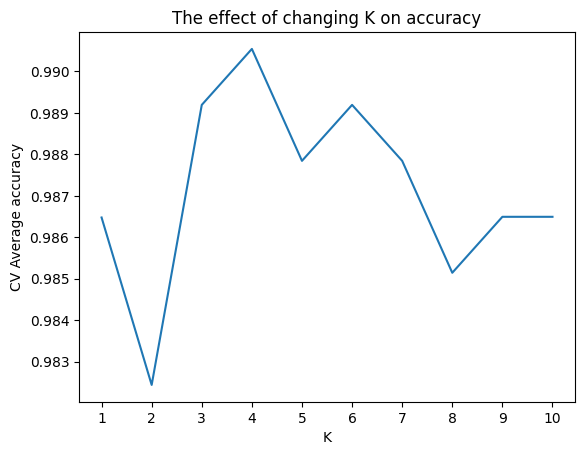

Best K: 4
Best Cross-Validation Score: 0.9905423345731433


In [28]:
# Create data for testing hyperparameters
neighbors = list(range(1, 11))
cv_scores = []

# Create KNN model and check it through KFold Cross-Validation on different number of neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train_pca, y_train,
                             cv=3, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

# Plot average accurancy on different number of neighbors
plt.title('The effect of changing K on accuracy')
plt.plot(neighbors, cv_scores)
plt.xlabel('K')
plt.xticks(neighbors)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', neighbors[np.argmax(cv_scores)])
print('Best Cross-Validation Score:', cv_scores[np.argmax(cv_scores)])

#### Check perfomance on testing set

In [29]:
# Fit model on training set with the best number of neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Check perfomance on testing set
y_pred = knn.predict(X_test_pca)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9891891891891892


### Naive Bayes

#### Check perfomance using cross validation on training set

In [30]:
# Create Naive Bayes model and check it through KFold Cross-Validation 
gauss_nb = GaussianNB()
scores = cross_val_score(gauss_nb, X_train, y_train,
                         cv=3, scoring='accuracy')
avg_score = np.mean(scores)
print('Cross-Validation score is:', avg_score)

Cross-Validation score is: 0.9838056680161943


#### Check perfomance on testing set

In [31]:
# Fit model on training set
gauss_nb.fit(X_train, y_train)

# Check perfomance on testing set
y_pred = gauss_nb.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))

Testing accuracy = 0.9837837837837838
